<a href="https://colab.research.google.com/github/gerega37/SPBYTHON/blob/main/SPBYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Для работы над датасетом импортируем необходимые библиотеки для работы с датасетами и визуализации полученных результатов

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy. stats as stats 
from scipy.stats import shapiro
from sklearn.metrics import r2_score

### Загружаем датасеты dataHERG1 и dataHERG2, содержащие информацию о физико-химических свойствах изучаемых нами молекул, соединяем их в единный датасет по универсальному идентификатору SMILES

In [196]:
dataHERG1 = pd.read_csv('https://raw.githubusercontent.com/gerega37/mipt_study/main/dataHERG.csv', sep=';')
dataHERG1.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL3121096,NaN,0,339.44,0,2.55,"S,R(-)-4b, (1S,6R(-)-4b), S,R-4b",O=C1NN=C(c2ccc(OC3CCN(C4CCC4)CC3)cc2)[C@@H]2C[...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL3120141,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2014.0,None,NaN
1,CHEMBL23,DILTIAZEM,4,414.53,0,3.37,Diltiazem,COc1ccc([C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1135758,1,Scientific Literature,J. Med. Chem.,2002.0,None,NaN
2,CHEMBL556247,NaN,0,408.42,0,2.77,6,CN1C[C@H]2[C@@H](C1)[C@@H]2CN(Cc1cccc(OC(F)(F)...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1158414,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2009.0,CHEMBL3307715,NaN
3,CHEMBL216959,NaN,0,499.65,0,2.30,4g,O=C1CN(CCc2ccc(F)cc2)CCN1[C@H]1CCc2cc(CN3CCS(=...,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1137586,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2007.0,None,NaN
4,CHEMBL214969,NaN,0,338.34,0,2.68,8c,COc1ccc2c(=O)n(CCO)c(C#N)c(-c3cccc(F)c3)c2c1,IC50,'=',...,HERG,Homo sapiens,SINGLE PROTEIN,CHEMBL1137352,1,Scientific Literature,J. Med. Chem.,2006.0,None,NaN


In [197]:
dataHERG2 = pd.read_csv('https://raw.githubusercontent.com/gerega37/mipt_study/main/DOWNLOAD-beYKwKxjZ7zLbBnw2_3J6C0Ar_Tmp1Q6yJetu-ec8VA%3D.csv', sep=';')
dataHERG2

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL215526,NaN,NaN,Small molecule,0,429.67,2,2,3.82,26.79,...,-1,30,4,0,0,429.2814,BASE,C25H39N3OS,CCN(CC)Cc1ccc2c(c1)CC[C@H](N1CCN(CCC3CCCS3)CC1...,JDFGTSZHKOFGPM-UXMRNZNESA-N
1,CHEMBL2386633,NaN,NaN,Small molecule,0,309.37,23,59,3.22,90.52,...,-1,23,6,2,0,309.1590,NEUTRAL,C17H19N5O,C[C@@H](O)c1nc2cnc3[nH]ccc3c2n1[C@H]1CC[C@H](C...,ANDWOIMHOOWCLK-IJLUTSLNSA-N
2,CHEMBL3353485,NaN,NaN,Small molecule,0,499.03,6,8,4.98,77.92,...,-1,34,6,1,0,498.1380,ACID,C26H27ClN2O4S,CC1(C(=O)N(CCCC(=O)O)Cc2ccc(Cl)cc2)CCN1C(=O)Cc...,TYKKHMYHGUEWSL-UHFFFAOYSA-N
3,CHEMBL194564,NaN,NaN,Small molecule,0,412.87,6,28,4.25,63.94,...,-1,29,6,1,0,412.1190,NEUTRAL,C22H21ClN2O4,O=c1cc(NC2CCN(Cc3ccc4c(c3)OCO4)CC2)c2cc(Cl)ccc2o1,FBKMRPXQTLKWBJ-UHFFFAOYSA-N
4,CHEMBL3799831,NaN,NaN,Small molecule,0,467.50,21,38,2.87,75.46,...,-1,34,8,0,0,467.1856,NEUTRAL,C25H26FN3O5,CN(C)C(=O)c1cc(CN2CCOc3c(F)cccc32)c2oc(N3CCOCC...,ZCBWPTBPKMKOLE-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16977,CHEMBL2364639,VALBENAZINE,MT-5199|NBI-98854|VALBENAZINE,Small molecule,4,418.58,1,1,3.56,74.02,...,0,30,6,2,0,418.2832,NEUTRAL,C24H38N2O4,COc1cc2c(cc1OC)[C@H]1C[C@@H](OC(=O)[C@@H](N)C(...,GEJDGVNQKABXKG-CFKGEZKQSA-N
16978,CHEMBL3929590,NaN,NaN,Small molecule,0,481.58,2,2,1.17,118.69,...,-1,34,9,1,0,481.1784,NEUTRAL,C24H27N5O4S,N#Cc1ccc(OCCN2CC3CN(CCNS(=O)(=O)c4ccccc4C#N)CC...,JWWYVNFEGBCQDQ-UHFFFAOYSA-N
16979,CHEMBL2407989,NaN,NaN,Small molecule,0,452.56,2,5,2.79,83.14,...,-1,33,8,2,0,452.2424,NEUTRAL,C25H32N4O4,CCOc1cc(CN2CCN(c3ccc(C(=O)NC)cc3C)CC2)cc2c1OC(...,JSXWZGIORINZQT-UHFFFAOYSA-N
16980,CHEMBL2436624,NaN,NaN,Small molecule,0,495.64,7,7,3.42,74.93,...,-1,36,7,2,0,495.3010,BASE,C28H38FN5O2,COc1ccc2c(c1)CN(C1CCN(C(=O)C3(F)CCN(Cc4ccnc(N)...,PTPOPPWALKSUMU-UHFFFAOYSA-N


In [198]:
dataHERG = pd.merge(dataHERG1, dataHERG2, on='Smiles')

### Проанализируем полученный датасет по количеству пропущенных значений, а также типу данных каждого признака

In [199]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12907 entries, 0 to 12906
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Molecule ChEMBL ID               12907 non-null  object 
 1   Molecule Name                    2615 non-null   object 
 2   Molecule Max Phase               12907 non-null  int64  
 3   Molecular Weight_x               12907 non-null  object 
 4   #RO5 Violations_x                12907 non-null  object 
 5   AlogP_x                          12907 non-null  object 
 6   Compound Key                     12907 non-null  object 
 7   Smiles                           12107 non-null  object 
 8   Standard Type                    12907 non-null  object 
 9   Standard Relation                10551 non-null  object 
 10  Standard Value                   10557 non-null  float64
 11  Standard Units                   10558 non-null  object 
 12  pChEMBL Value     

In [200]:
# Перекодируем признак "Standard Relation" из символьного в бинарный
def make_activity(row: pd.DataFrame) -> str:
    """
    Check 'Standard Relation' values to detect activity between the compound and the target 

    param: row is a pd.DataFrame
    return: 1 if Active, 0 if Inactive, 2 if Unknown
    """
    mask1 = row['Standard Relation'] == "'<'"
    mask2 = row['Standard Relation'] == "'<='"
    mask3 = row['Standard Relation'] == "'='"
    mask4 = row['Standard Relation'] == "'~'"
    mask5 = row['Standard Relation'] == "'>'"
    mask6 = row['Standard Relation'] == "'>='"
    if mask1 | mask2 | mask3 | mask4:
        return 1
    elif mask5 | mask6:
        return 0
    else:
        return 2

In [201]:
# Для выполнения условия функции make_activity стандартные единицы измерения должны быть в nM
dataHERG = dataHERG[dataHERG['Standard Units'] == 'nM']

In [202]:
dataHERG['Activity_level'] = dataHERG.apply(lambda row: make_activity(row), axis=1)

In [203]:
#понадобится для датасета2
dataHERG_copy = dataHERG

### После применения данной функции были обнаружены 7 наблюдений с неизвестной активностью. Учитывая соотношению ко всем наблюдениям датасета - удалим наблюдения с уровнем активности 'Unknown'

In [204]:
dataHERG = dataHERG.drop(dataHERG[dataHERG['Activity_level']==2].index, axis=0)

In [205]:
# Удаляем молекулы, которые содержат порядка 70% NaN
thresh = dataHERG.shape[0]*0.7
dataHERG = dataHERG.dropna(how='any', thresh=thresh, axis=1)

In [206]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10542 entries, 0 to 12906
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Molecule ChEMBL ID               10542 non-null  object 
 1   Molecule Max Phase               10542 non-null  int64  
 2   Molecular Weight_x               10542 non-null  object 
 3   #RO5 Violations_x                10542 non-null  object 
 4   AlogP_x                          10542 non-null  object 
 5   Compound Key                     10542 non-null  object 
 6   Smiles                           10542 non-null  object 
 7   Standard Type                    10542 non-null  object 
 8   Standard Relation                10542 non-null  object 
 9   Standard Value                   10542 non-null  float64
 10  Standard Units                   10542 non-null  object 
 11  pChEMBL Value                    7588 non-null   float64
 12  Uo Units          

In [207]:
# Проанализируем признаки на информативность после проделанных манипуляций и удалим оставшиеся неинформативные
low_information_cols = []

for col in dataHERG.columns:
    top_freq = dataHERG[col].value_counts(normalize=True).max()
    nunique_ratio = dataHERG[col].nunique() / dataHERG[col].count()
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Standard Type: 100.0% одинаковых значений
Standard Units: 100.0% одинаковых значений
Uo Units: 100.0% одинаковых значений
Assay Type: 96.55% одинаковых значений
Assay Organism: 96.63% одинаковых значений
Assay Tissue ChEMBL ID: 99.96% одинаковых значений
Assay Tissue Name: 99.95% одинаковых значений
Assay Subcellular Fraction: 99.63% одинаковых значений
Target ChEMBL ID: 100.0% одинаковых значений
Target Name: 100.0% одинаковых значений
Target Organism: 100.0% одинаковых значений
Target Type: 100.0% одинаковых значений
Type: 100.0% одинаковых значений
Passes Ro3: 99.21% одинаковых значений
Structure Type: 100.0% одинаковых значений


In [208]:
dataHERG = dataHERG.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {dataHERG.shape[1]}')

Результирующее число признаков: 49


In [209]:
# Удалим наиболее неинформативные и повторяющиеся признаки
dataHERG = dataHERG.drop(columns={
    'Document Year', 
    'Assay Description',
    'Assay Cell Type',
    'Molecular Weight_y', 
    '#RO5 Violations_y', 
    'AlogP_y',
    'Inchi Key'
    })

In [210]:
dataHERG.columns = dataHERG.columns.str.rstrip('_x')

In [ ]:
dataHERG.describe()

,Molecule Max Phase,Standard Value,pChEMBL Value,Potential Duplicate,Source ID,Max Phase,Targets,Bioactivities,Inorganic Flag,Molecular Weight (Monoisotopic),Activity_level
count,10591.000000,1.059100e+04,7618.000000,10591.000000,10591.000000,10591.000000,10591.000000,10591.000000,10591.000000,10591.000000,10591.000000
mean,0.353036,8.293278e+05,5.514911,0.071570,2.832027,0.353036,22.828911,137.174582,-0.899537,436.224011,0.760457
std,1.106723,2.357604e+07,0.939633,0.257787,7.875076,1.106723,74.826437,701.896065,0.300630,84.546971,0.426825
min,0.000000,1.400000e-01,2.360000,0.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,94.053100,0.000000
25%,0.000000,1.995260e+03,4.880000,0.000000,1.000000,0.000000,3.000000,4.000000,-1.000000,381.029150,1.000000
50%,0.000000,9.900000e+03,5.340000,0.000000,1.000000,0.000000,5.000000,8.000000,-1.000000,437.222700,1.000000
75%,0.000000,3.000000e+04,5.930000,0.000000,1.000000,0.000000,10.000000,21.000000,-1.000000,488.197000,1.000000
max,4.000000,1.000000e+09,9.850000,1.000000,38.000000,4.000000,1194.000000,17911.000000,0.000000,1241.713200,1.000000


In [211]:
dataHERG = dataHERG.drop(columns={
    'Compound Key', 'Assay ChEMBL ID', 'BAO Format ID', 'BAO Label', 
    'Document ChEMBL ID', 'Document Journal', 'Cell ChEMBL ID', 'CX Acidic pKa', 
    'CX LogP', 'Potential Duplicate', '#RO5 Violations (Lipinski)', 'CX LogD',
    'Max Phase', 'Molecular Species', 'pChEMBL Value'
    }
)

In [212]:
# Удаляем все пропуски в данных, поскольку эти показатели рассчитываются из свойства молекулы
# пропуски в такого типа данных нельзя заменять на моду, медиану или среднее
dataHERG = dataHERG.dropna()

In [213]:
dataHERG = dataHERG.replace('None', np.nan)

In [214]:
dataHERG = dataHERG.dropna()

In [215]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9922 entries, 0 to 12906
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Molecule ChEMBL ID               9922 non-null   object 
 1   Molecule Max Phase               9922 non-null   int64  
 2   Molecular Weight                 9922 non-null   object 
 3   #RO5 Violations                  9922 non-null   object 
 4   AlogP                            9922 non-null   object 
 5   Smiles                           9922 non-null   object 
 6   Standard Relation                9922 non-null   object 
 7   Standard Value                   9922 non-null   float64
 8   Source ID                        9922 non-null   int64  
 9   Source Description               9922 non-null   object 
 10  ChEMBL ID                        9922 non-null   object 
 11  Targets                          9922 non-null   int64  
 12  Bioactivities      

In [216]:
# continuous variables
var_real = [
    'AlogP', 'CX Basic pKa', 'Molecular Weight', 'Molecular Weight (Monoisotopic)',
    'Polar Surface Area', 'QED Weighted', 'Standard Value',
    'Molecular Weight (Monoisotopic)', 'Polar Surface Area', 'QED Weighted',
    'Standard Value', '#Rotatable Bonds', 
    'Bioactivities', 'HBA', 'HBA (Lipinski)', 'HBD', 'HBD (Lipinski)',
    'Heavy Atoms', 'Targets']

# categorical variables
var_cat = ['#RO5 Violations', 'Molecule Max Phase', 'Inorganic Flag', 'Aromatic Rings']
# id
id = ['Molecule ChEMBL ID', 'Smiles', 'ChEMBL ID', 'Molecular Formula']

### Приведем свойства из типа данных (object) к числовым типам данных (int, float) для удобства дальнейшего использования данных

In [219]:
for column in var_real:
    dataHERG[column] = dataHERG[column].astype(float)

In [218]:
for column in var_cat:
    dataHERG[column] = dataHERG[column].astype(int)

In [ ]:
dataHERG = dataHERG.drop_duplicates(subset=['Smiles'], keep='last')

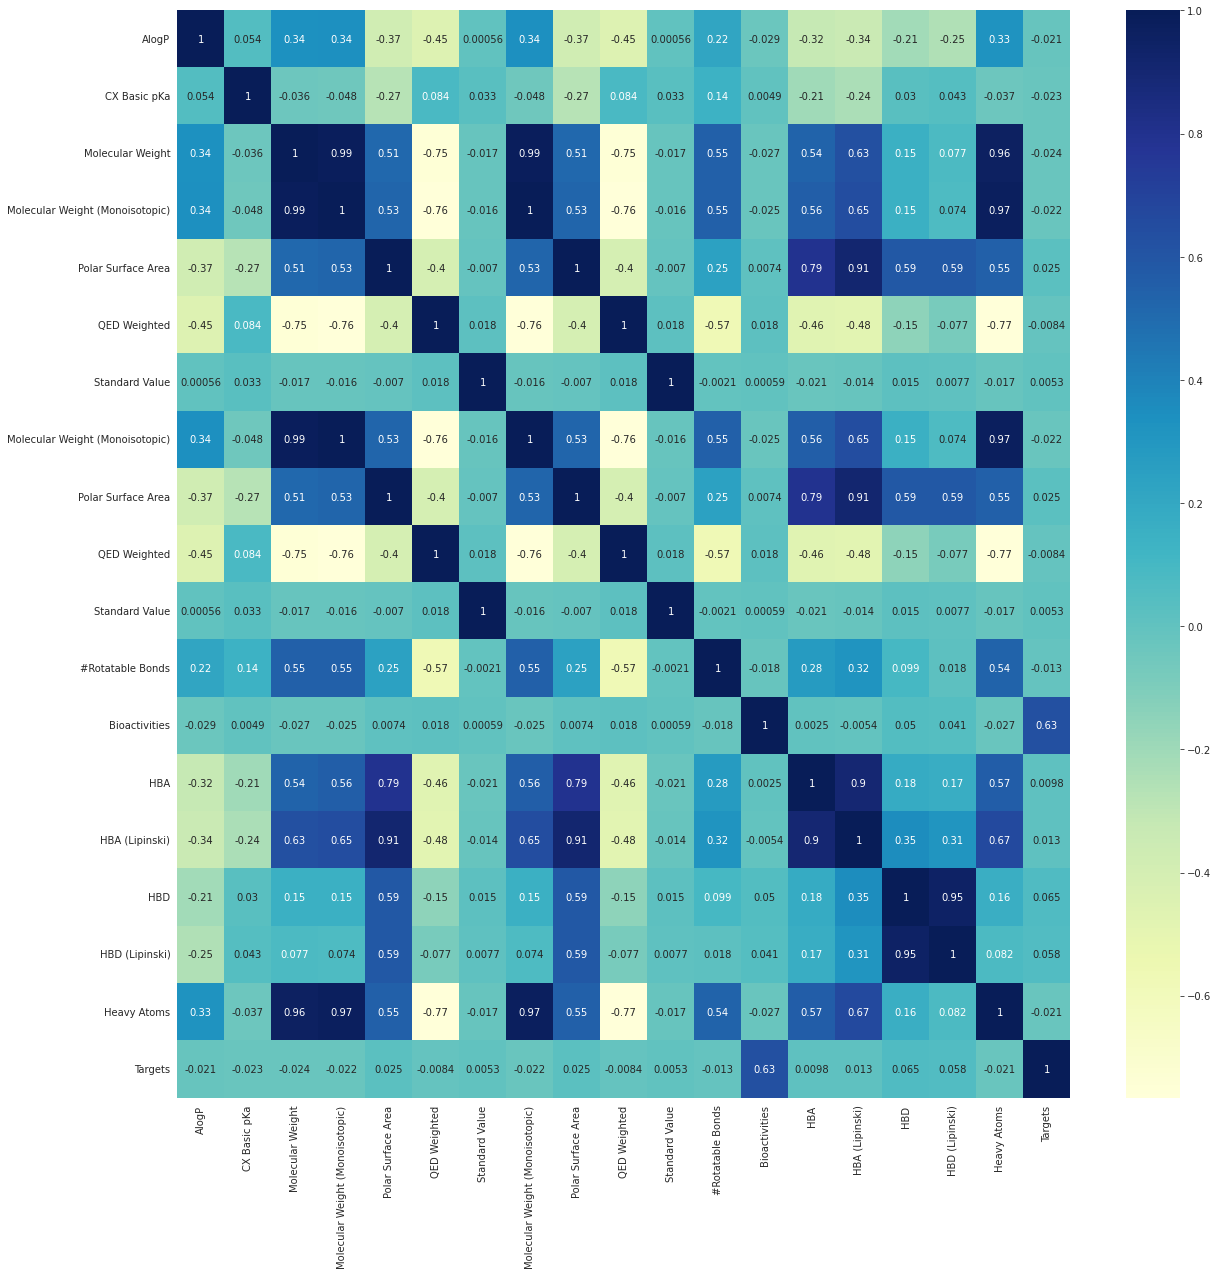

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(dataHERG[var_real].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
# Согласно тепловой карте, обнаружены признаки, которые сильно коррелируют друг с другом
# Удалим их и признаки, которые имеют нулевую корреляцию с остальными
low_informative_features = [
    'Molecular Weight (Monoisotopic)',
    'Heavy Atoms',
    'QED Weighted',
    'HBD (Lipinski)',
    'HBA (Lipinski)',
    'Bioactivities',
    'Targets',
    'CX Basic pKa', 
    'Standard Value',
    'Molecule ChEMBL ID',
    'Standard Relation',
    'Source ID',
    'Source Description',
    'ChEMBL ID',
    'Molecular Formula'
]

In [ ]:
dataHERG = dataHERG.drop(columns=low_informative_features)

In [ ]:
var_real = [i for i in var_real if i not in low_informative_features]

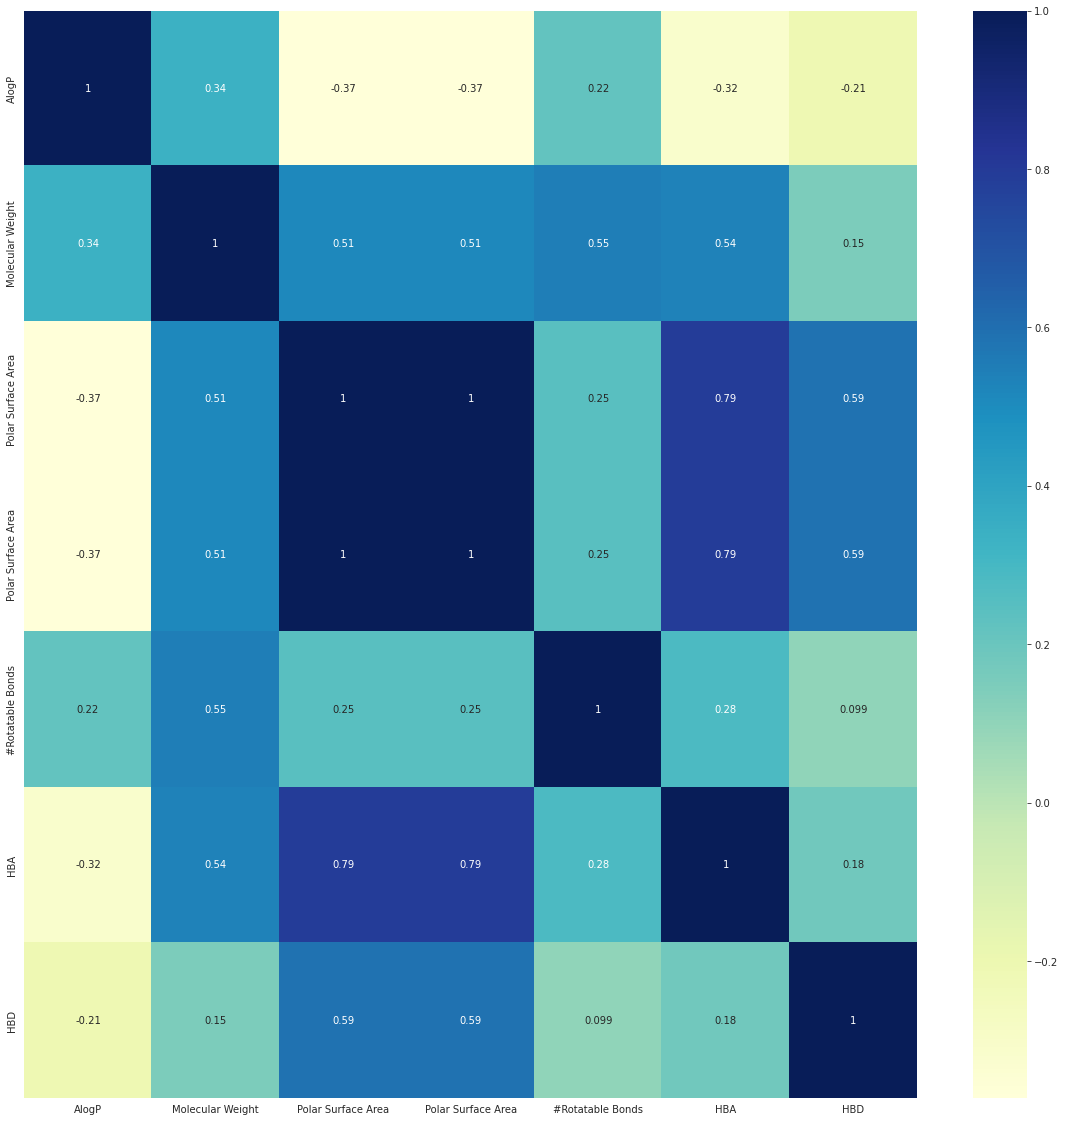

In [ ]:
# plotting correlation heatmap
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(dataHERG[var_real].corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
dataHERG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 0 to 12961
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule Max Phase  8280 non-null   int64  
 1   Molecular Weight    8280 non-null   float64
 2   #RO5 Violations     8280 non-null   int64  
 3   AlogP               8280 non-null   float64
 4   Smiles              8280 non-null   object 
 5   Polar Surface Area  8280 non-null   float64
 6   HBA                 8280 non-null   float64
 7   HBD                 8280 non-null   float64
 8   #Rotatable Bonds    8280 non-null   float64
 9   Aromatic Rings      8280 non-null   int64  
 10  Inorganic Flag      8280 non-null   int64  
 11  Activity_level      8280 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 840.9+ KB


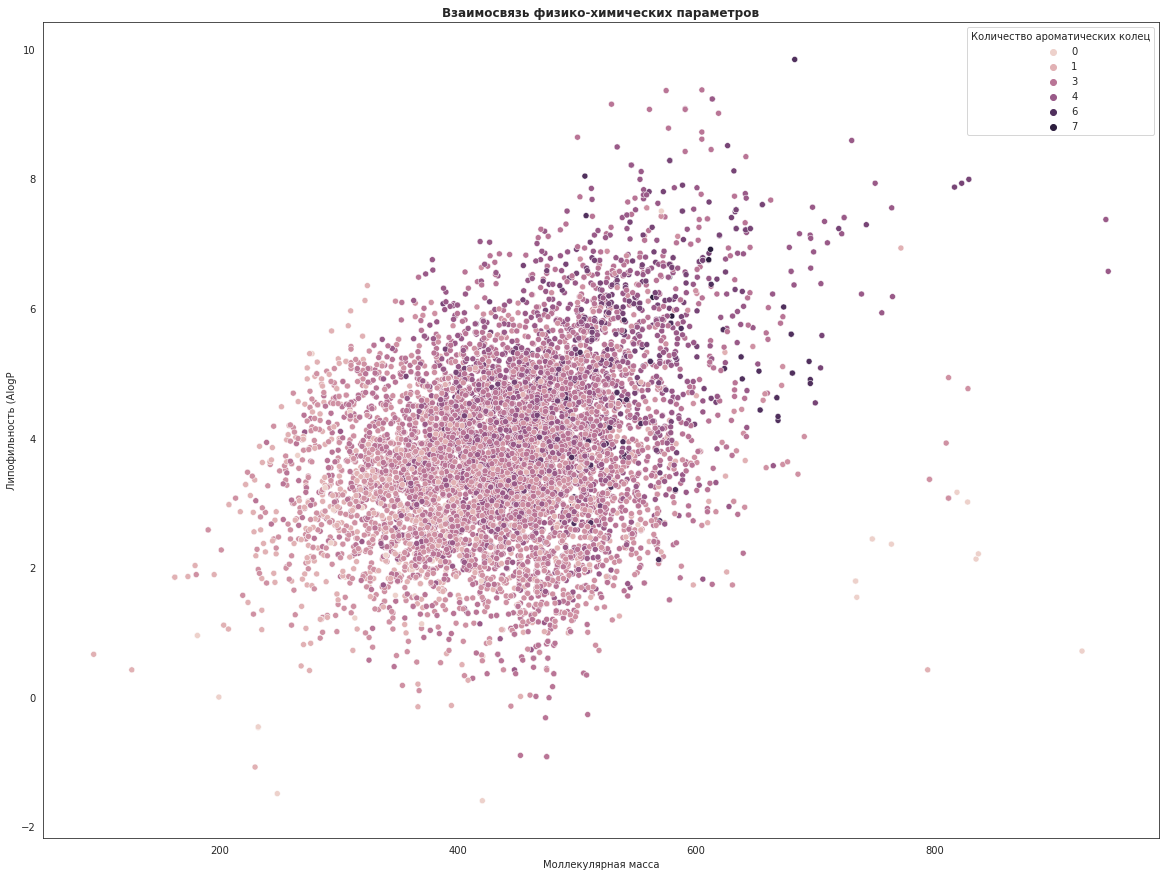

In [ ]:
plt.figure(figsize=(20, 15))
g = sns.scatterplot(data=dataHERG, x="Molecular Weight", y="AlogP", hue='Aromatic Rings')

g.set_title("Взаимосвязь физико-химических параметров", weight="bold")
g.set_xlabel("Моллекулярная масса")
g.set_ylabel("Липофильность (AlogP")
g.get_legend().set_title("Количество ароматических колец")

**Статистический анализ**

Как известно из литературных источник физико-химические свойства молекул во многом определяют их биологический эффект. Для оценки межгрупповых различий между моллекулами по физико-химическим свойствам был проведен статистический анализ. Параметры для анализа были выбраны на основании литературных данных, как ассоциированные с HERG токсичностью.

In [ ]:
dataHERG = dataHERG.loc[dataHERG['Polar Surface Area'] != 319.61]

In [ ]:
#формирование групп на основании активности показанной в тесте


Herg_active = dataHERG[dataHERG['Activity_level'] == 1]

Herg_nonactive = dataHERG[dataHERG['Activity_level'] == 0]

**Описательные статистики**

In [ ]:
Herg_active[['AlogP', 'Polar Surface Area', 'Molecular Weight', 'Aromatic Rings']].describe()

,AlogP,Polar Surface Area,Molecular Weight,Aromatic Rings
count,6279.000000,6279.000000,6279.000000,6279.000000
mean,3.890417,74.136385,444.131347,2.804109
std,1.335372,30.944748,82.707051,1.010384
min,-1.600000,3.240000,94.120000,0.000000
25%,3.020000,53.010000,390.410000,2.000000
50%,3.860000,73.410000,446.540000,3.000000
75%,4.720000,94.900000,495.550000,3.000000
max,9.840000,216.890000,837.060000,7.000000


In [ ]:
Herg_nonactive[['AlogP', 'Polar Surface Area', 'Molecular Weight', 'Aromatic Rings']].describe()

,AlogP,Polar Surface Area,Molecular Weight,Aromatic Rings
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,3.415650,86.368975,440.80532,2.698000
std,1.421942,29.540682,89.75443,1.092883
min,-1.490000,6.480000,126.11000,0.000000
25%,2.410000,63.830000,377.92000,2.000000
50%,3.250000,86.450000,437.51500,3.000000
75%,4.222500,106.365000,498.60750,3.000000
max,9.230000,218.180000,946.09000,7.000000


**Оценка нормальности расределения**

Не смотря на то, что распределение в целом походило на нормальное, было решено использовать непараметрические тесты, так как в данных наблюдались выбросы, которые нежелательно было устранять.

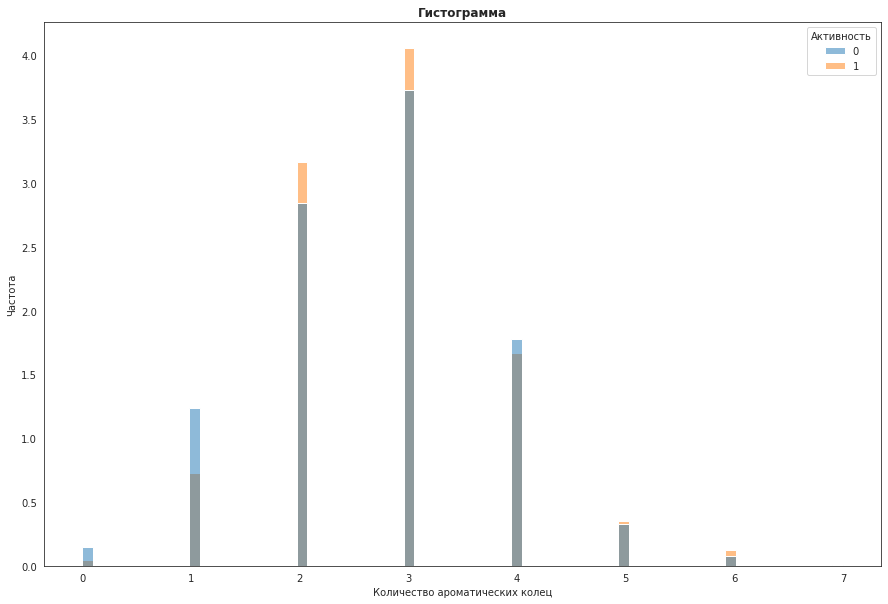

In [ ]:
plt.figure(figsize=(15, 10))
g = sns.histplot(data = dataHERG, x='Aromatic Rings', hue='Activity_level', stat='density', common_norm=False)

g.set_title("Гистограмма", weight="bold")
g.set_xlabel("Количество ароматических колец")
g.set_ylabel("Частота")
g.get_legend().set_title("Активность")


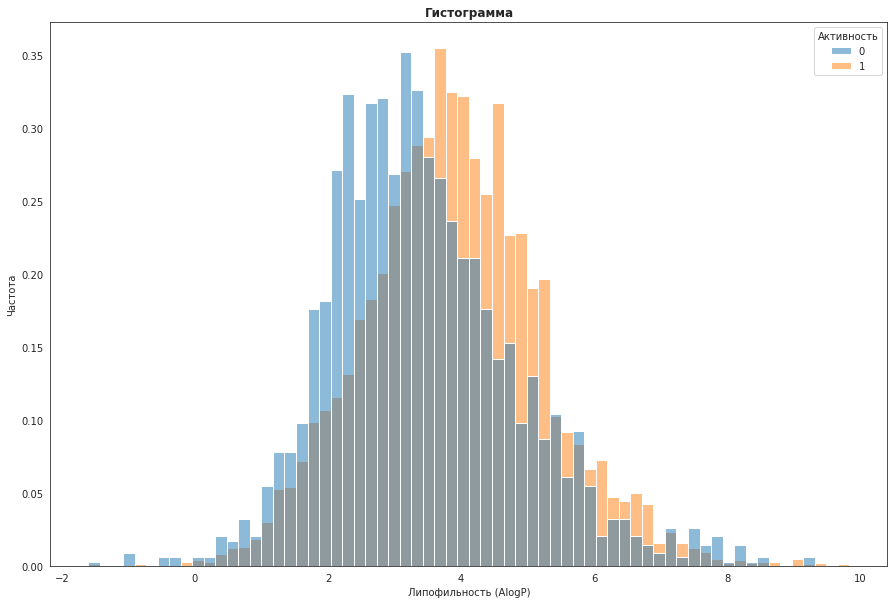

In [ ]:
plt.figure(figsize=(15, 10))
g = sns.histplot(data = dataHERG, x='AlogP', hue='Activity_level', stat='density', common_norm=False)

g.set_title("Гистограмма", weight="bold")
g.set_xlabel("Липофильность (AlogP)")
g.set_ylabel("Частота")
g.get_legend().set_title("Активность")

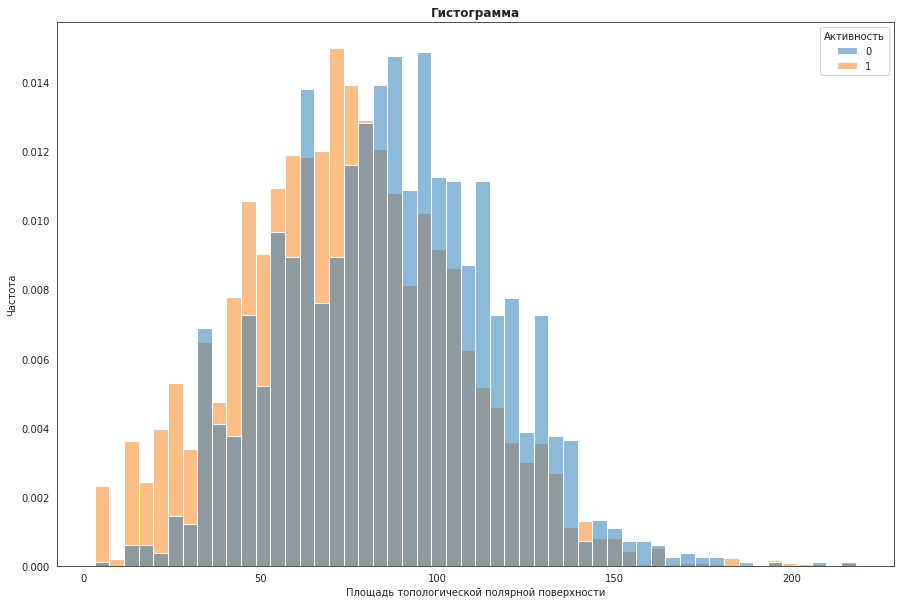

In [ ]:
plt.figure(figsize=(15, 10))
g = sns.histplot(data = dataHERG, x='Polar Surface Area', hue='Activity_level', stat='density', common_norm=False)

g.set_title("Гистограмма", weight="bold")
g.set_xlabel("Площадь топологической полярной поверхности")
g.set_ylabel("Частота")
g.get_legend().set_title("Активность")

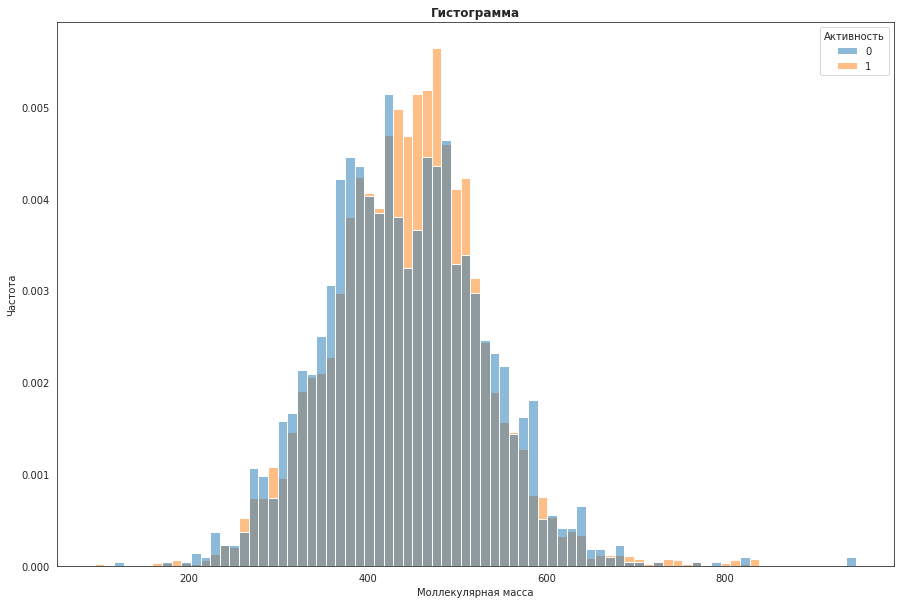

In [ ]:
plt.figure(figsize=(15, 10))
g = sns.histplot(data = dataHERG, x='Molecular Weight', hue='Activity_level', stat='density', common_norm=False)

g.set_title("Гистограмма", weight="bold")
g.set_xlabel("Моллекулярная масса")
g.set_ylabel("Частота")
g.get_legend().set_title("Активность")

Статистический анализ осуществлялся методом Манна-уитни

In [ ]:
stats. mannwhitneyu (Herg_active['Aromatic Rings'], Herg_nonactive['Aromatic Rings'], alternative='two-sided')
#можно отвергнуть нулевую гипотезу

MannwhitneyuResult(statistic=6553494.0, pvalue=0.0019497353634858898)

Text(0, 0.5, 'Количество ароматических колец')

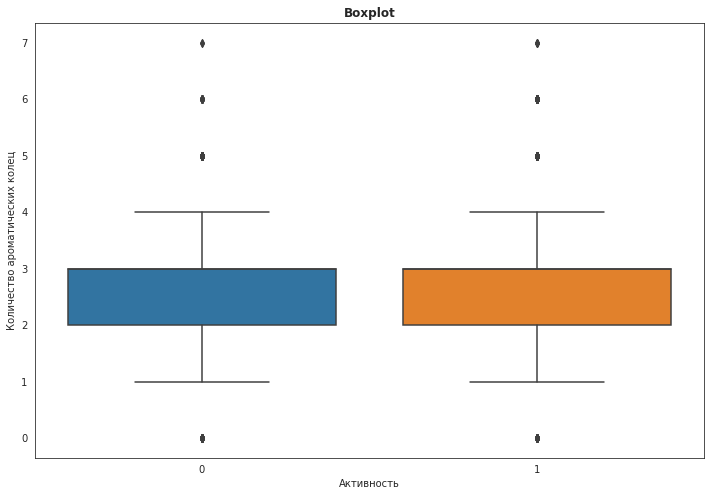

In [ ]:
plt.figure(figsize=(12, 8))

g = sns.boxplot(x = 'Activity_level', y = 'Aromatic Rings', data = dataHERG)

g.set_title("Boxplot", weight="bold")
g.set_xlabel("Активность")
g.set_ylabel("Количество ароматических колец")

In [ ]:
stats. mannwhitneyu (Herg_active['AlogP'], Herg_nonactive['AlogP'], alternative='two-sided')
#можно отвергнуть нулевую гипотезу

MannwhitneyuResult(statistic=7703822.5, pvalue=6.913967077293559e-53)

Text(0, 0.5, 'Липофильность (AlogP)')

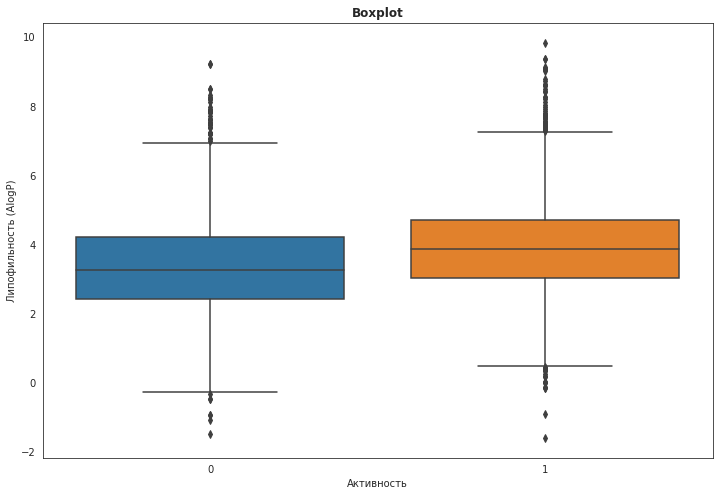

In [ ]:
plt.figure(figsize=(12, 8))

g = sns.boxplot(x = 'Activity_level', y = 'AlogP', data = dataHERG)

g.set_title("Boxplot", weight="bold")
g.set_xlabel("Активность")
g.set_ylabel("Липофильность (AlogP)")

In [ ]:
stats. mannwhitneyu (Herg_active['Polar Surface Area'], Herg_nonactive['Polar Surface Area'], alternative='two-sided')

#можно отвергнуть нулевую гипотезу

MannwhitneyuResult(statistic=4846848.0, pvalue=2.054549259555878e-53)

Text(0, 0.5, 'Площадь топологической полярной поверхности')

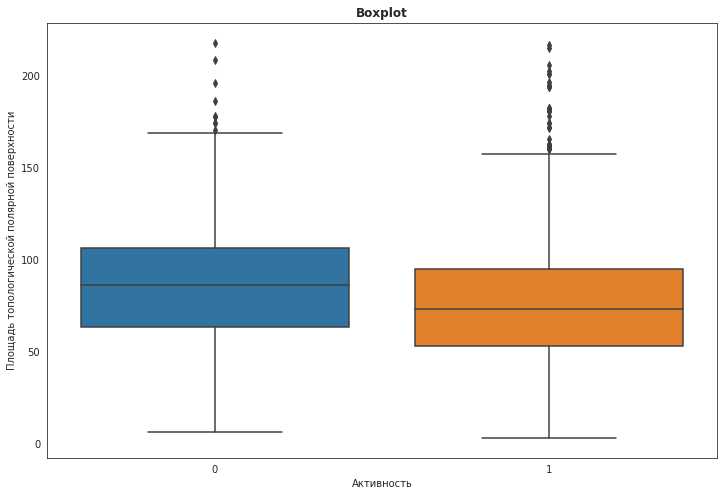

In [ ]:
plt.figure(figsize=(12, 8))
g = sns.boxplot(x = 'Activity_level', y = 'Polar Surface Area', data = dataHERG)

g.set_title("Boxplot", weight="bold")
g.set_xlabel("Активность")
g.set_ylabel("Площадь топологической полярной поверхности")

In [ ]:
stats. mannwhitneyu (Herg_active['Molecular Weight'], Herg_nonactive['Molecular Weight'], alternative='two-sided')

#можно отвергнуть нулевую гипотезу

MannwhitneyuResult(statistic=6468105.0, pvalue=0.04220415820408398)

Text(0, 0.5, 'Молекулярная масса')

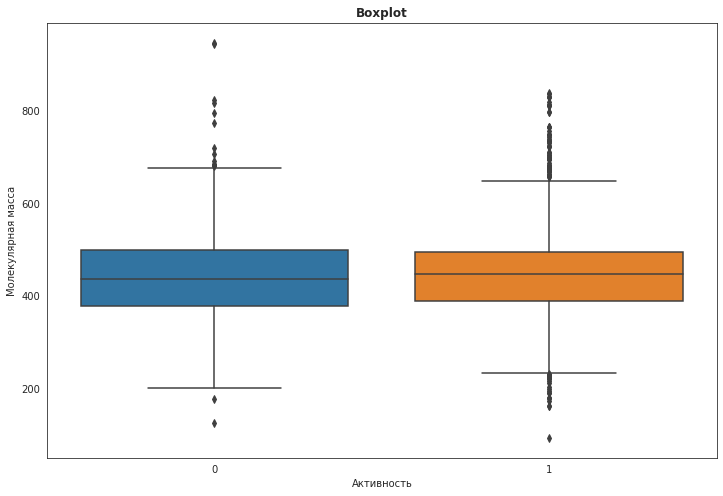

In [ ]:
plt.figure(figsize=(12, 8))
g = sns.boxplot(x = 'Activity_level', y = 'Molecular Weight', data = dataHERG)

g.set_title("Boxplot", weight="bold")
g.set_xlabel("Активность")
g.set_ylabel("Молекулярная масса")

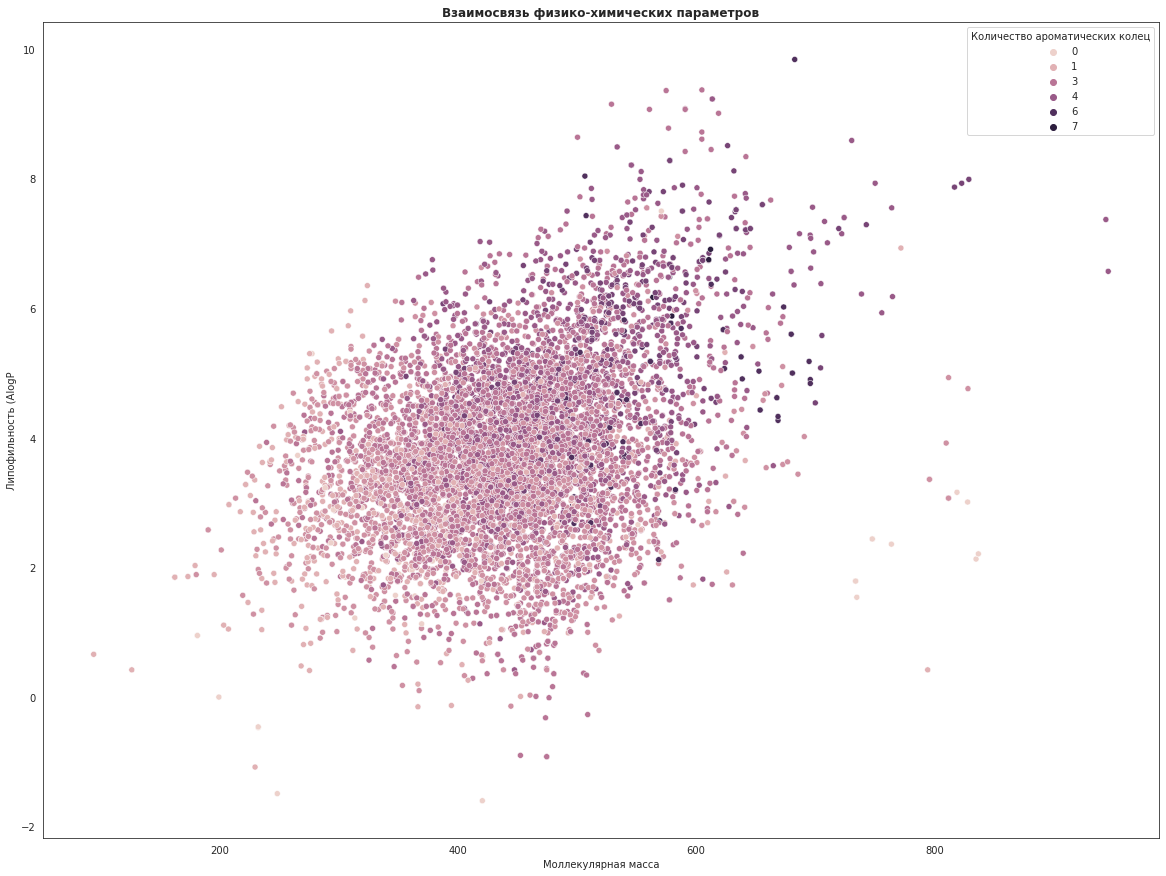

In [ ]:
plt.figure(figsize=(20, 15))
g = sns.scatterplot(data=dataHERG, x="Molecular Weight", y="AlogP", hue='Aromatic Rings')

g.set_title("Взаимосвязь физико-химических параметров", weight="bold")
g.set_xlabel("Моллекулярная масса")
g.set_ylabel("Липофильность (AlogP")
g.get_legend().set_title("Количество ароматических колец")

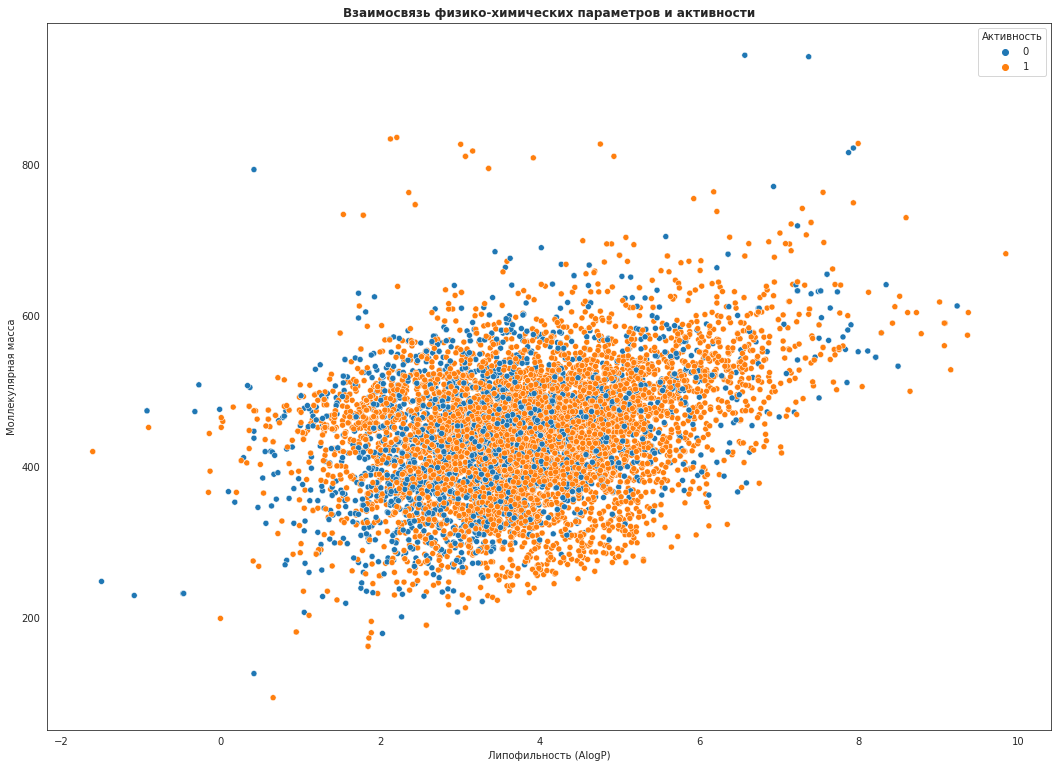

In [ ]:
plt.figure(figsize=(18, 13))
g = sns.scatterplot(data=dataHERG, x="AlogP", y="Molecular Weight", hue="Activity_level")

g.set_title("Взаимосвязь физико-химических параметров и активности", weight="bold")
g.set_xlabel("Липофильность (AlogP)")
g.set_ylabel("Моллекулярная масса")
g.get_legend().set_title("Активность")

<Figure size 1296x936 with 0 Axes>

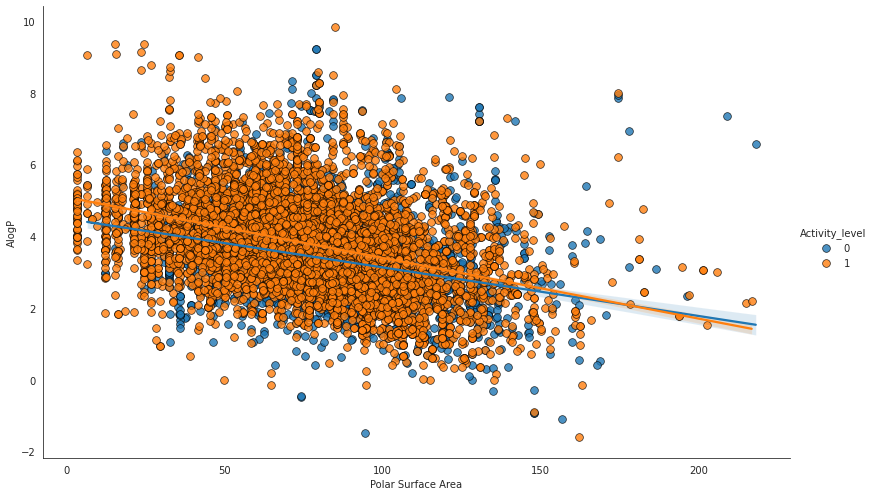

<Figure size 1296x936 with 0 Axes>

In [ ]:
plt.figure(figsize=(18, 13))

sns.set_style("white")
g = sns.lmplot(x="Polar Surface Area", y = "AlogP", hue= "Activity_level", data=dataHERG, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

plt.figure(figsize=(18, 13))

plt.show()

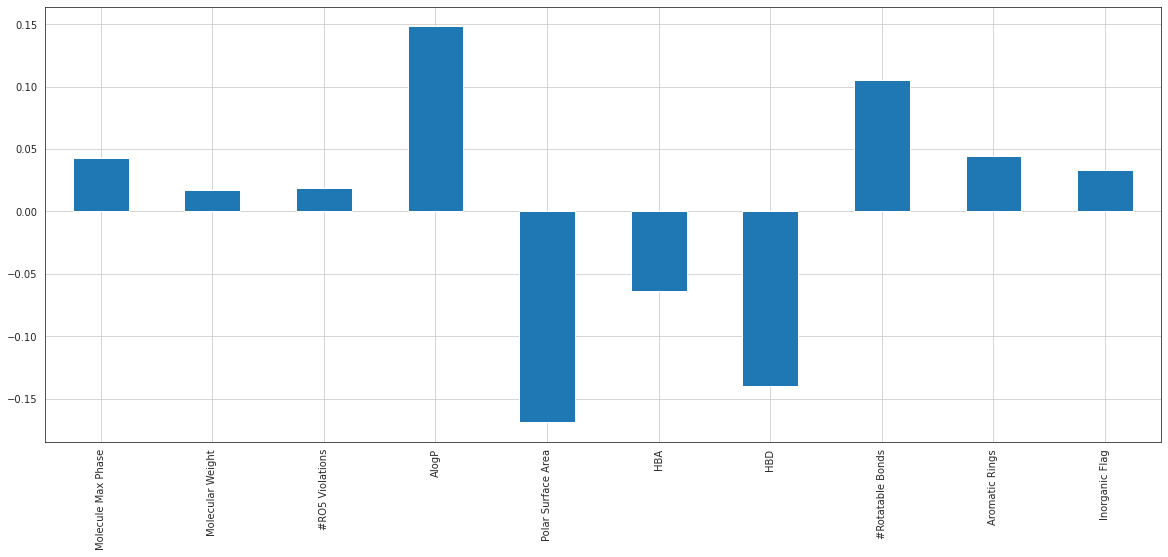

In [ ]:
dataHERG.drop('Activity_level', axis=1).corrwith(dataHERG.Activity_level).plot(kind='bar', grid=True, figsize=(20,8));

Кластеризация

In [ ]:
df_copy = dataHERG.copy()

In [ ]:
df_copy = df_copy.drop(columns={'Smiles'})

In [ ]:
df_copy = df_copy.dropna()

In [ ]:
# Нормализуем числовые признаки для обучения модели
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_copy)
df_scaled = pd.DataFrame(scaled, columns = df_copy.columns.tolist())
df_scaled.head(3)

,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Polar Surface Area,HBA,HBD,#Rotatable Bonds,Aromatic Rings,Inorganic Flag,Activity_level
0,-0.187148,-1.228316,-0.614812,-0.893058,-0.744134,-0.815444,-0.265264,-0.774768,-1.722707,-0.204381,0.564519
1,6.073806,-0.340987,-0.614812,-0.295429,-0.578883,0.124536,-1.193183,0.092662,-0.753882,4.892827,0.564519
2,-0.187148,-0.413188,-0.614812,-0.732718,-0.850986,-0.345454,-1.193183,0.092662,-0.753882,-0.204381,0.564519


Text(0, 0.5, 'WCSS')

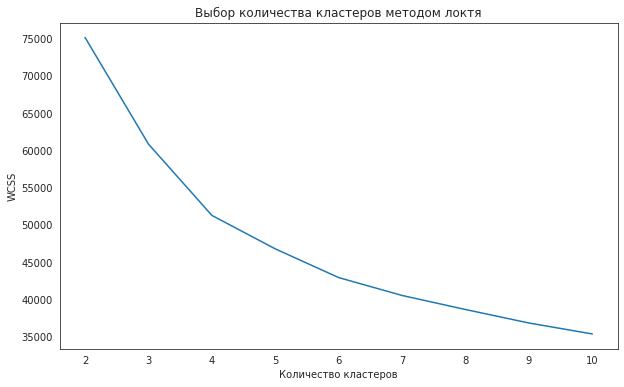

In [ ]:
# Обучим модель K ближайших соседей
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot as plt


# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
chs = []

for i in range(2, 11):
    
    # настроим параметры модели
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(df_scaled)
    labels = kmeans.fit_predict(df_scaled)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)
    chs.append(metrics.calinski_harabasz_score(df_scaled, labels))

# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(2, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

Text(0, 0.5, 'CHS')

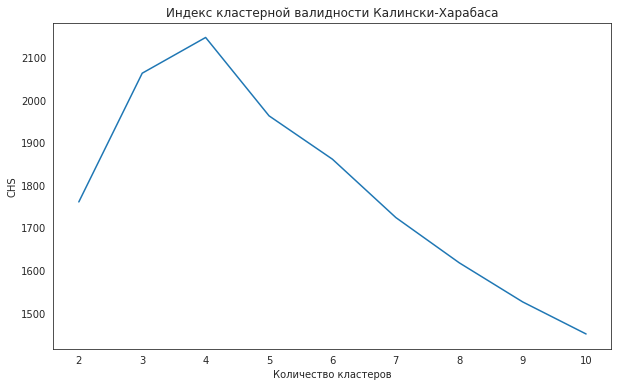

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(2, 11), chs)
# и добавим подписи
plt.title('Индекс кластерной валидности Калински-Харабаса')
plt.xlabel('Количество кластеров')
plt.ylabel('CHS')

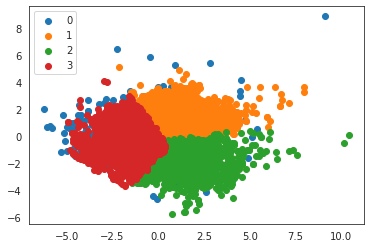

In [ ]:
# Заново обучим модель с четырьмя кластерами и визуализируем их
from sklearn.decomposition import PCA

# Выделим две гланые компоненты
pca = PCA(2)
df = pca.fit_transform(df_scaled)

# Обучим модель и определим лейблы кластеров
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
label = kmeans.fit_predict(df_scaled)

# Визуализируем
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Коэффициенты признаков
print(abs(pca.components_))

[[0.09399915 0.49471825 0.35251704 0.11337798 0.41781709 0.41322324
  0.20040232 0.3325004  0.32342446 0.08964805 0.02475581]
 [0.04165519 0.13709392 0.37278395 0.60067733 0.41925029 0.3047886
  0.34102616 0.14276346 0.15926019 0.05084344 0.21539028]]


In [ ]:
def create_importance_dataframe(pca, original_num_df):

    # Переводим коэффициенты pcs из массива в датафрейм
    importance_df = pd.DataFrame(pca.components_)

    # Назначаем столбцы
    importance_df.columns = original_num_df.columns

    # Переходим абсолютным значениям
    importance_df = importance_df.apply(np.abs)

    # Транспонируем
    importance_df = importance_df.transpose()

    # Снова изменим названия столбцов

    ## Получим количество коэффициентов pcs
    num_pcs = importance_df.shape[1]

    ## Создаём новые имена столбцов
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Переименовываем
    importance_df.columns = new_columns

    # Возвращаем датафрейм с ранжировкой по важности
    return importance_df

In [ ]:
# Вызываем функцию для создания датафрейма
importance_df  = create_importance_dataframe(pca, df_scaled)

# Демонстрируем несколько первых признаков
display(importance_df.head())

# Сортировка в зависимости от вклада признака

## PC1 топ 10 важных признаков
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 feautres are \n')
display(pc1_top_10_features )

## PC2 топ 10 важных признаков
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 feautres are \n')
display(pc2_top_10_features )

,PC1,PC2
Molecule Max Phase,0.093999,0.041655
Molecular Weight,0.494718,0.137094
#RO5 Violations,0.352517,0.372784
AlogP,0.113378,0.600677
Polar Surface Area,0.417817,0.419250



PC1 top 10 feautres are 



Molecular Weight      0.494718
Polar Surface Area    0.417817
HBA                   0.413223
#RO5 Violations       0.352517
#Rotatable Bonds      0.332500
Aromatic Rings        0.323424
HBD                   0.200402
AlogP                 0.113378
Molecule Max Phase    0.093999
Inorganic Flag        0.089648
Name: PC1, dtype: float64


PC2 top 10 feautres are 



AlogP                 0.600677
Polar Surface Area    0.419250
#RO5 Violations       0.372784
HBD                   0.341026
HBA                   0.304789
Activity_level        0.215390
Aromatic Rings        0.159260
#Rotatable Bonds      0.142763
Molecular Weight      0.137094
Inorganic Flag        0.050843
Name: PC2, dtype: float64

**Датасет №2**

In [ ]:
# https://tatonettilab.org/offsides/
# выгружаем файл из базы данных "OFFSIDE (registred drugs (INN) adverse events; in accordance to MedDRA)
adverse_event=pd.read_csv('https://raw.githubusercontent.com/Anastasia-Kholodnaia/MPTU/main/adverse_reactions.csv')

In [ ]:
# выбираем только побочные эффекты в соответствии с ожидаемыми проявлениями hERG toxicity
mask1 = adverse_event['pt_meddra_term'] == 'Electrocardiogram QT prolonged'
mask2 = adverse_event['pt_meddra_term'] == 'Electrocardiogram QT corrected interval prolonged'
mask3 = adverse_event['pt_meddra_term'] == 'Tachyarrhythmia'
mask4 = adverse_event['pt_meddra_term'] == 'Ventricular tachyarrhythmia'
mask5 = adverse_event['pt_meddra_term'] == 'Torsade de pointes'
mask6 = adverse_event['pt_meddra_term'] == 'Electrocardiogram abnormal'
mask7 = adverse_event['pt_meddra_term'] == 'Cardiotoxicity'
mask8 = adverse_event['pt_meddra_term'] == 'Cardiovascular disoder'
mask9 = adverse_event['pt_meddra_term'] == 'Cardiovascular insufficiency'
mask10 = adverse_event['pt_meddra_term'] == 'Cardiomyopathy'
mask11 = adverse_event['pt_meddra_term'] == 'Cardiogenic shock'



adverse_event = adverse_event[mask1 | mask2 | mask3 | mask4 | mask5 | mask6 | mask7 | mask8 | mask9 | mask10 | mask11]

In [ ]:
adverse_event.drop(adverse_event.columns.difference(['ingredients_names','pt_meddra_term']), 1, inplace=True)

<ipython-input-62-aa797e362290>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  adverse_event.drop(adverse_event.columns.difference(['ingredients_names','pt_meddra_term']), 1, inplace=True)


In [ ]:
adverse_event.columns=['DRUG','ADVERSE']

In [ ]:
adverse_event['DRUG'] = adverse_event['DRUG'].str.upper()

In [ ]:
adverse_event = adverse_event.drop_duplicates (['DRUG'])

In [ ]:
# база данных "SIDER" (registred drugs (INN) adverse events; in accordance to MedDRA) - http://sideeffects.embl.de/
drug_data = pd.read_csv('https://raw.githubusercontent.com/Anastasia-Kholodnaia/MPTU/main/meddra_all_se_EDITED.tsv', sep='\t')

In [ ]:
# Очищаем, оставляя только "Preffered term"
drug_data = drug_data.query("TERM == 'PT'")

In [ ]:
drug_data.drop(drug_data.columns.difference(['CID','ADVERSE']), 1, inplace=True)

<ipython-input-68-2cdf1e4f5189>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_data.drop(drug_data.columns.difference(['CID','ADVERSE']), 1, inplace=True)


In [ ]:
# выбираем только побочные эффекты в соответствии с ожидаемыми проявлениями hERG toxicity
mask_1 = drug_data['ADVERSE'] == 'Electrocardiogram QT prolonged'
mask_2 = drug_data['ADVERSE'] == 'Electrocardiogram QT corrected interval prolonged'
mask_3 = drug_data['ADVERSE'] == 'Tachyarrhythmia'
mask_4 = drug_data['ADVERSE'] == 'Ventricular tachyarrhythmia'
mask_5 =  drug_data['ADVERSE'] == 'Torsade de pointes'
mask_6 = drug_data['ADVERSE'] == 'Electrocardiogram abnormal'
mask_7 = drug_data['ADVERSE'] == 'Cardiotoxicity'
mask_8 = drug_data['ADVERSE'] == 'Cardiovascular disoder'
mask_9 = drug_data['ADVERSE'] == 'Cardiovascular insufficiency'
mask_10 = drug_data['ADVERSE'] == 'Cardiomyopathy'
mask_11 = drug_data['ADVERSE'] == 'Cardiogenic shock'

drug_data = drug_data[mask_1 | mask_2 | mask_3 | mask_4 | mask_5 | mask_6 | mask_7 | mask_8 | mask_9 | mask_10 | mask_11]

In [ ]:
# SIDER database датасет Drug names+ CID  => подгружаем, чтобы далее получить CID
drug_names = pd.read_csv('https://raw.githubusercontent.com/Anastasia-Kholodnaia/MPTU/main/drug_names_edited.tsv', sep='\t')
drug_names.head()

,CID,Drug name
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate


In [ ]:
drug_list_2 = pd.merge(drug_data, drug_names, how='outer', on='CID')

In [ ]:
drug_list_2=drug_list_2.dropna()

In [ ]:
drug_list_2['ADVERSE'] = drug_list_2['ADVERSE'].str.upper()
drug_list_2.head()

,CID,ADVERSE,Drug name
0,CID100000085,ELECTROCARDIOGRAM ABNORMAL,carnitine
1,CID100000191,TORSADE DE POINTES,adenosine
2,CID100000214,ELECTROCARDIOGRAM ABNORMAL,PGE1
3,CID100000311,ELECTROCARDIOGRAM ABNORMAL,citric
4,CID100000596,CARDIOTOXICITY,cytarabine


In [ ]:
drug_list_2.columns=['CID', 'ADVERSE', 'DRUG']

In [ ]:
drug_list_2['DRUG'] = drug_list_2['DRUG'].str.upper()
drug_list_2.head()

,CID,ADVERSE,DRUG
0,CID100000085,ELECTROCARDIOGRAM ABNORMAL,CARNITINE
1,CID100000191,TORSADE DE POINTES,ADENOSINE
2,CID100000214,ELECTROCARDIOGRAM ABNORMAL,PGE1
3,CID100000311,ELECTROCARDIOGRAM ABNORMAL,CITRIC
4,CID100000596,CARDIOTOXICITY,CYTARABINE


In [ ]:
drug_list_2 = drug_list_2.drop_duplicates (['DRUG'])

In [ ]:
drug_list_2.drop(drug_list_2.columns.difference(['CID','ADVERSE','DRUG']), 1, inplace=True)

<ipython-input-77-49294960fd08>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  drug_list_2.drop(drug_list_2.columns.difference(['CID','ADVERSE','DRUG']), 1, inplace=True)


In [ ]:
drugs_data = pd.merge(drug_list_2, adverse_event,how='outer', on='DRUG')

In [ ]:
drugs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CID        255 non-null    object
 1   ADVERSE_x  255 non-null    object
 2   DRUG       360 non-null    object
 3   ADVERSE_y  229 non-null    object
dtypes: object(4)
memory usage: 14.1+ KB


In [ ]:
drugs_data.head()

,CID,ADVERSE_x,DRUG,ADVERSE_y
0,CID100000085,ELECTROCARDIOGRAM ABNORMAL,CARNITINE,NaN
1,CID100000191,TORSADE DE POINTES,ADENOSINE,Torsade de pointes
2,CID100000214,ELECTROCARDIOGRAM ABNORMAL,PGE1,NaN
3,CID100000311,ELECTROCARDIOGRAM ABNORMAL,CITRIC,NaN
4,CID100000596,CARDIOTOXICITY,CYTARABINE,Cardiomyopathy


In [ ]:
drugs_data['ADVERSE_x'] = drugs_data['ADVERSE_x'].fillna(drugs_data['ADVERSE_y'])

In [ ]:
drugs_data['ADVERSE_x'] = drugs_data['ADVERSE_x'].str.upper()
display(drugs_data['ADVERSE_x'].unique())

array(['ELECTROCARDIOGRAM ABNORMAL', 'TORSADE DE POINTES',
       'CARDIOTOXICITY', 'TACHYARRHYTHMIA', 'CARDIOGENIC SHOCK',
       'CARDIOMYOPATHY', 'ELECTROCARDIOGRAM QT PROLONGED',
       'CARDIOVASCULAR INSUFFICIENCY', 'VENTRICULAR TACHYARRHYTHMIA'],
      dtype=object)

In [ ]:
# для того, чтобы нарисовать график частоты встречаемости различных кардио-побочных эффектов среди препаратов, унифицируем обозначение тахиаритмий  
drugs_data = drugs_data.replace({'ADVERSE_x' : {'VENTRICULAR TACHYARRHYTHMIA' : 'TACHYARRHYTHMIA'}})

In [ ]:
drugs_data = drugs_data.drop(columns={'ADVERSE_y'})

In [ ]:
drugs_data = drugs_data.rename(columns={'ADVERSE_x': 'ADVERSE'})

In [ ]:
drugs_data

,CID,ADVERSE,DRUG
0,CID100000085,ELECTROCARDIOGRAM ABNORMAL,CARNITINE
1,CID100000191,TORSADE DE POINTES,ADENOSINE
2,CID100000214,ELECTROCARDIOGRAM ABNORMAL,PGE1
3,CID100000311,ELECTROCARDIOGRAM ABNORMAL,CITRIC
4,CID100000596,CARDIOTOXICITY,CYTARABINE
...,...,...,...
355,NaN,ELECTROCARDIOGRAM ABNORMAL,SUFENTANIL
356,NaN,CARDIOVASCULAR INSUFFICIENCY,"NALOXONE, OXYCODONE"
357,NaN,TACHYARRHYTHMIA,"LITHIUM CARBONATE, LITHIUM CITRATE"
358,NaN,CARDIOMYOPATHY,OSIMERTINIB


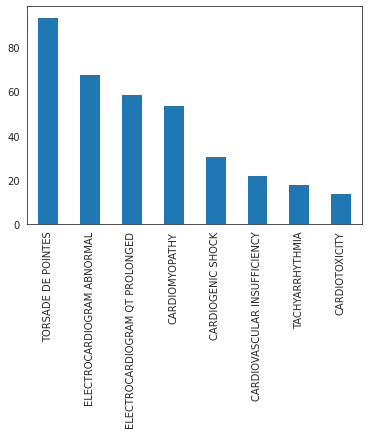

In [ ]:
# график частоты встречаемости различных кардио-побочных эффектов среди препаратов в выборке
drugs_data['ADVERSE'].value_counts(sort=True).plot.bar();

In [ ]:
pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=2dfedd297e5e7097359fcd8456f5cea7cca4bc42918668700ad78933f58988bf
  Stored in directory: /root/.cache/pip/wheels/b0/8c/ba/3b00b89931153bf5a4eaa8e73bd1b0319a879cc45175326854
Successfully built pubchempy


In [ ]:
import pubchempy as pcp

In [ ]:
# Из библиотеки PubChem получаем уникальные идентификаторы SMILES по названию лекарства
list_of_chemicals = drugs_data['DRUG'].tolist()
list_of_smiles = []


for chemical_name in list_of_chemicals:
    cid = pcp.get_cids(chemical_name)
    smiles = pcp.get_properties('CanonicalSMILES', chemical_name, namespace='name')
    for k, v,  in [x.items() for x in smiles]:
        list_of_smiles.append(smiles)

In [ ]:
for item in list_of_smiles:
    for k, v  in [x.items() for x in item]:
        drugs_data['Smiles'] = v[1]

In [ ]:
drugs_data

,CID,ADVERSE,DRUG,Smiles
0,CID100000085,ELECTROCARDIOGRAM ABNORMAL,CARNITINE,CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...
1,CID100000191,TORSADE DE POINTES,ADENOSINE,CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...
2,CID100000214,ELECTROCARDIOGRAM ABNORMAL,PGE1,CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...
3,CID100000311,ELECTROCARDIOGRAM ABNORMAL,CITRIC,CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...
4,CID100000596,CARDIOTOXICITY,CYTARABINE,CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...
...,...,...,...,...
355,NaN,ELECTROCARDIOGRAM ABNORMAL,SUFENTANIL,CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...
356,NaN,CARDIOVASCULAR INSUFFICIENCY,"NALOXONE, OXYCODONE",CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...
357,NaN,TACHYARRHYTHMIA,"LITHIUM CARBONATE, LITHIUM CITRATE",CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...
358,NaN,CARDIOMYOPATHY,OSIMERTINIB,CC(C)CC(C(=O)C1(CO1)C)NC(=O)C(CC2=CC=CC=C2)NC(...


In [ ]:
clinical = pd.read_csv('https://raw.githubusercontent.com/gerega37/Spbython2022/main/clinical_data.csv', sep=';')
clinical = clinical.drop(columns={'Type'})
clinical.head()

,ChEMBL ID,Name,Synonyms,Smiles
0,CHEMBL2023898,DACLATASVIR,BMS 790052|BMS-790052|DACLATASVIR|DAKLINZA|EBP...,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2ccc(-c3...
1,CHEMBL1200961,BROMPHENIRAMINE MALEATE,(+)-Brompheniramine Maleate|BROMPHENIRAMINE MA...,CN(C)CCC(c1ccc(Br)cc1)c1ccccn1.O=C(O)/C=C\C(=O)O
2,CHEMBL1200927,DEXCHLORPHENIRAMINE MALEATE,CHLORPHENIRAMINE D-FORM MALEATE|CHLORPHENIRAMI...,CN(C)CC[C@@H](c1ccc(Cl)cc1)c1ccccn1.O=C(O)/C=C...
3,CHEMBL1201023,ORPHENADRINE HYDROCHLORIDE,BIORPHEN|DISIPAL|MEPHENAMIN|NSC-82357|ORPHENAD...,Cc1ccccc1C(OCCN(C)C)c1ccccc1.Cl
4,CHEMBL572,NITROFURANTOIN,BERKFURIN|CEDURAN|Dantafur|FURALAN|Furadantin|...,O=C1CN(/N=C/c2ccc([N+](=O)[O-])o2)C(=O)N1


In [ ]:
drug_data.merge(dataHERG, on='Smiles')

In [ ]:
dataHERG_smiles = dataHERG['Smiles'].tolist()

In [ ]:
common_smiles = [i for i in list_of_smiles if i in dataHERG_smiles]

In [ ]:
common_smiles

[]

Общих идентификаторов в двух датасетах не обнаружено